<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        Projet: 🤖 Méthodologies de l’IA 
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Utilisation des réseaux multi-couches pour l’analyse des 😞 sentiments 😄.
       </h2>
</center>

<div style="font-size:1.3em">
    <span>
    Réalisé par :¶
    </span>
      <ul>
         <li>ELGHABI Taha</li>
         <li>XXX xxx</li>
         <li>XXX xxx</li>
      </ul>
    <span>
    Encadré par :¶
    </span>
      <ul>
         <li>M. XXX xxx</li>
      </ul>
</div>

<div style="font-size:1.5rem">
    <p>📜 Table des matières:</p>
    <ul>
       <li>
          <a href="#Intro-section">Introduction 📖</a>
          <ul>
             <li><a href="#overview">Aperçu</a></li>
             <li><a href="#dataset">Jeu de données</a></li>
          </ul>
       </li>
       <li>
          <a href="#Analysis-section">Analyses et Transformations 🔎</a>
          <ul>
             <li><a href="#eda">Exploration de données</a></li>
             <li><a href="#trans">Transformation de données</a></li>
          </ul>
       </li>
       <li>
          <a href="#pre-processing">Pré-traitement ⚙️</a>
          <ul>
             <li><a href="#split-data">Diviser les données</a></li>
             <li><a href="#Vectorising">Vectoriser les phrases</a></li>
          </ul>
       </li>
       <li>
          <a href="#model-building">Construction des modèles 🛠️</a>
          <ul>
             <li><a href="#ml-basic">Modèles de base du ML </a></li>
             <li><a href="#ANN">Réseaux de neurones artificiels (ANN)</a></li>
             <li><a href="#word-embd">Word Embedding</a></li>
             <li><a href="#emb-lstm">Réseau de Neurones avec Embedding + LSTM</a></li>
          </ul>
       </li>
       <li><a href="#demo">Une démo live 🧮</a></li>
       <li><a href="#Conclusion">Conclusion 📌</a></li>
    </ul>
</div>

<center id="Intro-section">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Introduction 📖
        </h2>
</center>

<div id="overview">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Aperçu
        </h3>
</div>

<span style="color:grey; font-size:1.2em">Dans le cadre de notre etude Ce projet qui vise a Utilisation des <b>réseaux multi-couches</b> pour l’analyse des <b>sentiments</b> des phrases issues d’une base d’exemples qui contient des phrases étiquetées avec un sentiment positif ou négatif.
</span>

<div id="dataset">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Jeu de données
        </h3>
</div>


<span style="color:grey; font-size:1.2em">La série qu'on va traiter est <b> la température moyenne de Delhi</b>. Notre jeu de données contient des données de météo de<b> 2013 à 2017 échantillonnées</b>  chaque mois ainsi que des caractéristiques météorologiques supplémentaires telles que la pression, l'humidité, etc.</span>Commentaires client


<center id="Analysis-section">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Analyses et Transformations 🔎
        </h2>
</center>

<div id="eda">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Exploration de données
        </h3>
</div>

<h4 style="color:grey"> Importation de bibliothèques </h4>

In [1]:
# importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [2]:
#  ignorer les avertissements
import warnings

warnings.filterwarnings("ignore")

<span style="color:grey; font-size:1.2em">Important nos jeu de données sous les fichier <b>amazon_cells_labelled.txt</b> content les , <b>imdb_labelled.txt</b> et <b>yelp_labelled.txt</b> content  <b>csv</b>.</span>

In [3]:
# Dataset d'amazon
amazon_data = pd.read_csv("Data/amazon_cells_labelled.txt",delimiter='\t',header=None, names=["text","sentiment"])

# Dataset d'imdb
imdb_data = pd.read_csv("Data/imdb_labelled.txt",delimiter='\t',header=None, names=["text","sentiment"])

# Dataset de yeld
yelp_data = pd.read_csv("Data/yelp_labelled.txt",delimiter='\t',header=None, names=["text","sentiment"])

Datasets = {"amazon":amazon_data,"imdb":imdb_data,"yelp":yelp_data}

<h4 style="color:grey"> Explorant notre jeu de données </h4>

In [4]:
amazon_data.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
imdb_data.head()

,text,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [6]:
yelp_data.head()

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
for dataset in Datasets:
    print("la taille du dataset "+str(dataset)+" est: "+str(Datasets[dataset].shape[0]))


la taille du dataset amazon est: 1000
la taille du dataset imdb est: 748
la taille du dataset yelp est: 1000


<span style="color:grey; font-size:1.2em">Un aperçu des données en utilisant les fonctions <b>info()</b> et <b>describe()</b> du pandas pour examiner les données. </span>

In [8]:
for dataset in Datasets.keys():
    print("\n Les info sur le dataset "+str(dataset)+": \n")
    print(Datasets[dataset].info())


 Les info sur le dataset amazon: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None

 Les info sur le dataset imdb: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       748 non-null    object
 1   sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB
None

 Les info sur le dataset yelp: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   int64 
dt

In [9]:
for dataset in Datasets.keys():
    print("\n Une description sur du dataset "+str(dataset)+": \n")
    print(Datasets[dataset].describe())


 Une description sur du dataset amazon: 

        sentiment
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000

 Une description sur du dataset imdb: 

        sentiment
count  748.000000
mean     0.516043
std      0.500077
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000

 Une description sur du dataset yelp: 

        sentiment
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000


In [10]:
for dataset in Datasets.keys():
    print("\n Les valeurs null du dataset "+str(dataset)+" est: ")
    print(Datasets[dataset].isna().sum())


 Les valeurs null du dataset amazon est: 
text         0
sentiment    0
dtype: int64

 Les valeurs null du dataset imdb est: 
text         0
sentiment    0
dtype: int64

 Les valeurs null du dataset yelp est: 
text         0
sentiment    0
dtype: int64


<span style="color:grey; font-size:1.2em">Les données n'ont pas de <b>valeurs manquantes</b>, nous n'effectuerons donc pas un <b>nettoyage des données.</b> </span>

<div id="trans">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Transformation de données
        </h3>
</div>

<span style="color:grey; font-size:1.2em">On va créer un objet de type <b>pandas DataFrame</b> qui contient les données des trois Datasets.</span>

In [11]:
amazon_data['source']='amazon'
imdb_data['source']='imdb'
yelp_data['source']='yelp'

data  = pd.concat(list(Datasets.values()))

In [12]:
data.head()

,text,sentiment,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon


<span style="color:grey; font-size:1.2em">Analyons donc le nouveau jeu de données.</span>

In [13]:
print("la taille du nouveau dataset est: "+str(data.shape[0]))

la taille du nouveau dataset est: 2748


In [14]:
print("Une description sur du nouveau dataset:")
data.describe()

Une description sur du nouveau dataset:


,sentiment
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


le pourcentage de chaque source:


<AxesSubplot:ylabel='source'>

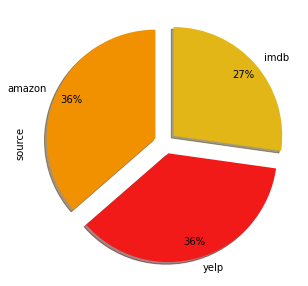

In [15]:
print("le pourcentage de chaque source:")
data['source'].value_counts().plot(kind='pie', 
                                   autopct='%1.0f%%',
                                   shadow=True, 
                                   startangle=90, 
                                   pctdistance=0.85,
                                   explode = (0.1,0.1,0.1),
                                   colors = ['#f19100','#f21919','#e2b616'],
                                   figsize=(5, 5))

le pourcentage des types de sentiments:


<AxesSubplot:ylabel='sentiment'>

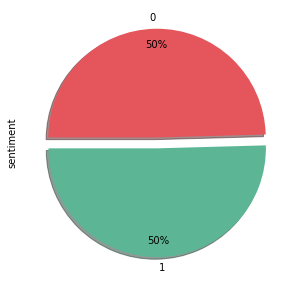

In [16]:
print("le pourcentage des types de sentiments:")
data.sentiment.value_counts().plot(kind='pie', 
                                   autopct='%1.0f%%',
                                   shadow=True, 
                                   startangle=180, 
                                   pctdistance=0.85,
                                   explode = (0.05,0.05),
                                   colors = ['#5cb696','#e4565c'],
                                   figsize=(5, 5))

<span style="color:grey; font-size:1.2em">Cet ensemble de données a <b>50/50</b> sentiments positifs et négatifs représentés par <b>1 et 0 </b>respectivement.</span>

<center id="pre-processing">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Pré-traitement ⚙️
        </h2>
</center>

<div id="split-data">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Diviser les données
        </h3>
</div>



<span style="color:grey; font-size:1.2em">Nous commençons par diviser notre jeu de données <b>75%</b> pour l'entraînement et <b>25%</b> pour le test.</span>


In [17]:
sentences = data['text'].values
y = data['sentiment'].values

# diviser les données
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                    test_size=0.25, 
                                                                    random_state=1000, 
                                                                    shuffle=True)

le pourcentage des types de sentiments pour les donnees d'entraînement:


<AxesSubplot:ylabel='sentiment'>

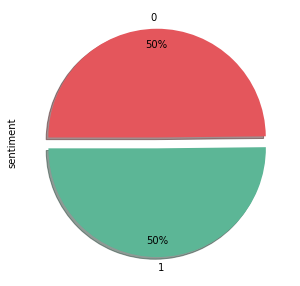

In [18]:
train_sentences = np.array(sentences_train)
train_labels = np.array(y_train)
train = pd.DataFrame({'sentiment': train_labels, 'text': list(train_sentences)}, columns=['sentiment', 'text'])

print("le pourcentage des types de sentiments pour les donnees d'entraînement:")
train.sentiment.value_counts().plot(kind='pie', 
                                   autopct='%1.0f%%',
                                   shadow=True, 
                                   startangle=180, 
                                   pctdistance=0.85,
                                   explode = (0.05,0.05),
                                   colors = ['#5cb696','#e4565c'],
                                   figsize=(5, 5))

<span style="color:grey; font-size:1.2em">L'échantillon de données d'apprentissage représente très bien l'ensemble de données</span>

<div id="Vectorising">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Vectoriser les phrases
        </h3>
</div>

<span style="color:grey; font-size:1.2em">D'aboard on doit créer un vocabulaire de tous les mots uniques dans les phrases. Pour cela on va utiliser `CountVectorizer` fourni par la bibliothèque `scikit-learn` pour vectoriser les phrases. Ce vocabulaire peut ensuite être utilisé pour créer un vecteur de caractéristiques du nombre de mots.<br> pour mieux comprendre prenant un example issue de notre jeu de données:</span>

In [19]:
sample_text = data['text'][:3]
for text in sample_text: print(text)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [20]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sample_text)
vectorizer.vocabulary_

{'So': 3,
 'there': 19,
 'is': 12,
 'no': 16,
 'way': 23,
 'for': 8,
 'me': 15,
 'to': 20,
 'plug': 17,
 'it': 13,
 'in': 11,
 'here': 10,
 'the': 18,
 'US': 4,
 'unless': 21,
 'go': 9,
 'by': 5,
 'converter': 7,
 'Good': 1,
 'case': 6,
 'Excellent': 0,
 'value': 22,
 'Great': 2,
 'jawbone': 14}

In [21]:
vectorizer.transform(sample_text).toarray()

array([[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0]], dtype=int64)

<span style="color:grey; font-size:1.2em">Créez les vecteurs de caractéristiques pour chaque phrase de l'ensemble d'entraînement et de test :</span>


In [22]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [23]:
print("le format final de nos données d'entraînement est:\n\n",X_train)

le format final de nos données d'entraînement est:

   (0, 185)	1
  (0, 340)	1
  (0, 358)	1
  (0, 1359)	1
  (0, 2050)	1
  (0, 3780)	1
  (1, 131)	1
  (1, 187)	1
  (1, 550)	1
  (1, 1427)	1
  (1, 1543)	1
  (1, 1656)	1
  (1, 2050)	1
  (1, 2489)	1
  (1, 2530)	1
  (1, 2763)	1
  (1, 4163)	1
  (1, 4189)	1
  (2, 101)	1
  (2, 187)	1
  (2, 258)	1
  (2, 373)	1
  (2, 504)	1
  (2, 951)	1
  (2, 1324)	1
  :	:
  (2060, 1401)	1
  (2060, 1474)	1
  (2060, 1546)	1
  (2060, 1638)	1
  (2060, 1793)	1
  (2060, 1845)	1
  (2060, 1900)	1
  (2060, 2024)	1
  (2060, 2055)	1
  (2060, 2069)	1
  (2060, 2293)	1
  (2060, 2314)	1
  (2060, 2355)	1
  (2060, 2444)	1
  (2060, 2449)	1
  (2060, 2450)	1
  (2060, 2467)	1
  (2060, 2586)	1
  (2060, 2640)	2
  (2060, 3511)	1
  (2060, 3730)	1
  (2060, 3759)	2
  (2060, 3825)	1
  (2060, 4169)	1
  (2060, 4207)	1


<center id="model-building">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Construction des modèles 🛠️
        </h2>
</center>

<div id="ml-basic">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Modèles de base du ML  
        </h3>
</div>


In [24]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy: {:.2f} %".format(score*100))

Accuracy: 75.98 %


<span style="color:grey; font-size:1.2em">On remarque que le DecisionTreeClassifier a atteint un impressionnant 74.36 %, mais regardons comment ce modèle fonctionne sur les autres ensembles de données dont nous disposons. Dans ce script, nous effectuons et évaluons un ensemble des modèles pour chaque ensemble de données:</span>

In [25]:
def prediction(model_name):
    for dataframe in Datasets.values():
        Sentences = dataframe['text'].values
        Y = dataframe['sentiment'].values

        Sentences_train, Sentences_test, Y_train, Y_test = train_test_split(
            Sentences, Y, test_size=0.25, random_state=1000)

        vectorizer = CountVectorizer(stop_words='english')
        vectorizer.fit(sentences_train)
        x_train = vectorizer.transform(Sentences_train)
        x_test  = vectorizer.transform(Sentences_test)

        model = models[model_name]
        model.fit(x_train, Y_train)
        score = model.score(x_test, Y_test)
        print('Accuracy for {} data with {} model is: {:.2f} %'.format(dataframe['source'][0],model_name, (score*100)))
    print('\n'+('-'*70)+'\n')

In [26]:
models = {"Logistic Regression": LogisticRegression(),
          "Support Vector Machine": SVC(),
          "Decision Tree": DecisionTreeClassifier(),
          "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=100, random_state=5000),
          "Random Forest": RandomForestClassifier(max_depth=200, random_state=1000)
         }

for model in models: prediction(model)

Accuracy for amazon data with Logistic Regression model is: 77.20 %
Accuracy for imdb data with Logistic Regression model is: 75.94 %
Accuracy for yelp data with Logistic Regression model is: 75.60 %

----------------------------------------------------------------------

Accuracy for amazon data with Support Vector Machine model is: 74.40 %
Accuracy for imdb data with Support Vector Machine model is: 72.19 %
Accuracy for yelp data with Support Vector Machine model is: 75.60 %

----------------------------------------------------------------------

Accuracy for amazon data with Decision Tree model is: 67.20 %
Accuracy for imdb data with Decision Tree model is: 67.38 %
Accuracy for yelp data with Decision Tree model is: 70.80 %

----------------------------------------------------------------------

Accuracy for amazon data with Gradient Boosting model is: 69.60 %
Accuracy for imdb data with Gradient Boosting model is: 70.05 %
Accuracy for yelp data with Gradient Boosting model is: 73.2

<span style="color:grey; font-size:1.2em">Comme on peut le voir, les approches ml de base obtiennent des résultats respectables, mais nous n'avons obtenu aucun modèle qui fonctionne très bien sur toutes les données</span>

<div id="ANN">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Réseaux de neurones artificiels (ANN)
        </h3>
</div>




<span style="color:grey; font-size:1.2em"> Pour notre Réseaux de neurones artificiels on va diviser notre jeu de données <b>80%</b> pour l'entraînement et <b>20%</b> pour le test, et pour la validation on prend <b>20%</b> des données d'entraînement</span>

In [27]:
X_train, X_val, y_train, y_val = train_test_split(sentences, y, test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
X_val  = vectorizer.transform(X_val)

<span style="color:grey; font-size:1.2em">Maintenant nous créons un nouveau modèle `Sequential()` puis nous ajoutons<b> 2 couches:</b> <br> une couche avec l'activation <b>relu</b> avec 10 unités et la deuxieme avec <b>softmax</b> un avec 2 unités afin d'obtenir la <b>certitude</b> pour chaque label.</span>

In [28]:
input_dim = X_train.shape[1]  # Number of features

ANN_model = Sequential()
ANN_model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
ANN_model.add(layers.Dense(2, activation='softmax'))   
# ANN_model.add(layers.Dense(1, activation='sigmoid'))

<span style="color:grey; font-size:1.2em">On choisit les paramètres de la méthode `.compile()`. <br>pour le paramètre <b>loss</b> est <i>sparse_categorical_crossentropy</i> afin de calculer la perte d'entropie croisée entre les deux "Labels" et les prédictions. pour <b>optimizer</b> on choisit: <i>adam</i> et bien sûr <i>accuracy</i> comme <b>metrics</b> </span>

In [29]:
# ANN_model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
ANN_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer = "adam", 
                  metrics = ["accuracy"])

<span style="color:grey; font-size:1.2em">Voyons un <b>summary<b> des paramètres de notre modèle</span>

In [30]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                42820     
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 42,842
Trainable params: 42,842
Non-trainable params: 0
_________________________________________________________________


<span style="color:grey; font-size:1.2em">Créons un objet contenant l'historique de notre formation de modèle:</span>

In [31]:
history = ANN_model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_val, y_val),
                    batch_size=10)

Epoch 1/20
176/176 [==============================] - 1s 3ms/step - loss: 0.6771 - accuracy: 0.6172 - val_loss: 0.6378 - val_accuracy: 0.7491
Epoch 2/20
176/176 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.8407 - val_loss: 0.5207 - val_accuracy: 0.7982
Epoch 3/20
176/176 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.9340 - val_loss: 0.4677 - val_accuracy: 0.8091
Epoch 4/20
176/176 [==============================] - 0s 2ms/step - loss: 0.2267 - accuracy: 0.9568 - val_loss: 0.4516 - val_accuracy: 0.8018
Epoch 5/20
176/176 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9664 - val_loss: 0.4517 - val_accuracy: 0.8073
Epoch 6/20
176/176 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9778 - val_loss: 0.4636 - val_accuracy: 0.7982
Epoch 7/20
176/176 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.9858 - val_loss: 0.4835 - val_accuracy: 0.7964
Epoch 

<span style="color:grey; font-size:1.2em">C'est temps d' <b>évaluer</b> notre modèle à la fois sur les données d'entraînement et de test et d'obtenir <b>scores</b> de précision.</span>

In [32]:
loss, accuracy = ANN_model.evaluate(X_train, y_train, verbose=False)
print("Accuracy sur les données d'entraînement est: {:.2f} %".format(accuracy*100))
loss, accuracy = ANN_model.evaluate(X_test, y_test, verbose=False)
print("Accuracy sur les données du test est: {:.2f} %".format(accuracy*100))

Accuracy sur les données d'entraînement est: 100.00 %
Accuracy sur les données du test est: 83.41 %


<span style="color:grey; font-size:1.2em">Traçons l'historique de nos score de modèle sur les données d'entraînement et de validation pour chaque <b>Epoch</b>.</span>

In [33]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

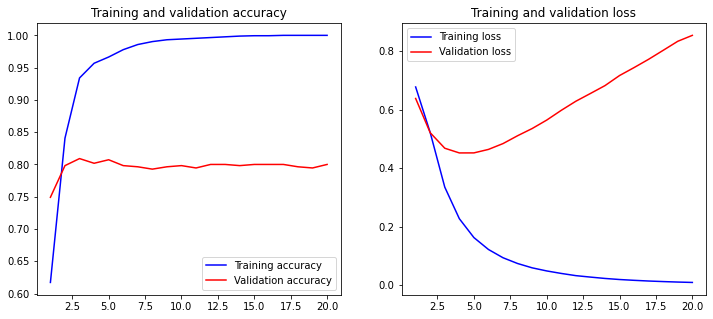

In [34]:
plot_history(history)

<span style="color:grey; font-size:1.2em">testons maintenant notre modèle avec une simple phrase 😃 <b>positive</b> </span>

In [35]:
# string pour le test
phrase = "boukhalef is a beautiful, calm and lovely place"

prediction_test = ANN_model.predict(vectorizer.transform([phrase]))
class_test = np.argmax(prediction_test)

print("Le Label prédite pour la phrase est: ",class_test)

Le Label prédite pour la phrase est:  1


<div id="word-embd">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Word Embedding
        </h3>
</div>


<span style="color:grey; font-size:1.2em">Le <b>Word Embedding</b> est une technique permet de représenter chaque mot d'un dictionnaire par un <b>vecteur de nombres réels</b>. Cette nouvelle représentation a ceci de particulier que les mots apparaissant dans des <b>contextes similaires</b> possèdent des vecteurs correspondants qui sont relativement <b>prochespositive</b>. </span>

<span style="color:grey; font-size:1.2em">Pour presenter des mots sous forme de vecteurs (ce qui est la manière courante d'utiliser le texte dans les réseaux de neurones) il y a deux façons possibles de représenter un mot sous forme de vecteur sont <b>One-hot encoding</b> et <b>Word embeddings</b>. </span>

<h4 style="font-size:1.2em">One-Hot Encoding</h4>

<span style="color:grey; font-size:1.2em">La première façon de représenter un mot sous forme de vecteur consiste à créer un One-Hot Encoding, qui se fait simplement en prenant un vecteur de la longueur du vocabulaire avec une entrée pour chaque mot du corpus.</span>

<h4 style="font-size:1.2em">Word embeddings</h4>

<span style="color:grey; font-size:1.2em">Cette méthode représente les mots sous forme de "dense word vectors" qui sont entraînés contrairement au dense One-Hot Encoding qui est codé en dur. Cela signifie que les intégrations de mots collectent plus d'informations dans moins de dimensions.</span>

<span style="color:grey; font-size:1.2em">Voice un example de Word Embedding sur l'un des reviews:</span>

<div id="emb-lstm">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Réseau de Neurones avec Embedding + LSTM
        </h3>
</div>

In [36]:
sentences_train, sentences_val, y_train, y_val = train_test_split(sentences, y, test_size=0.2, random_state=1000)
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences_train, y_train, test_size=0.25, random_state=1000)
#sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
X_val = tokenizer.texts_to_sequences(sentences_val)
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

print(vocab_size)


4013


In [37]:
# 
embedding_dim = 150
input_dim = X_train.shape[1] 
EMB_CNN = Sequential()

In [38]:
 #
EMB_CNN.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
EMB_CNN.add(layers.Conv1D(128, 5, activation='relu'))
EMB_CNN.add(layers.GlobalMaxPooling1D())
EMB_CNN.add(layers.Dense(10, activation='relu'))
EMB_CNN.add(layers.Dense(2, activation='softmax'))

In [39]:
# 
EMB_CNN.compile(loss='sparse_categorical_crossentropy',
                  optimizer = "adam", 
                  metrics = ["accuracy"])

In [40]:
# 
EMB_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 150)          601950    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           96128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 699,390
Trainable params: 699,390
Non-trainable params: 0
________________________________________________

In [41]:
history = EMB_CNN.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_val, y_val),
                    batch_size=32)

Epoch 1/10
52/52 [==============================] - 2s 28ms/step - loss: 0.6851 - accuracy: 0.5558 - val_loss: 0.6572 - val_accuracy: 0.6945
Epoch 2/10
52/52 [==============================] - 1s 25ms/step - loss: 0.4821 - accuracy: 0.8604 - val_loss: 0.4587 - val_accuracy: 0.7927
Epoch 3/10
52/52 [==============================] - 1s 25ms/step - loss: 0.1657 - accuracy: 0.9466 - val_loss: 0.4455 - val_accuracy: 0.8255
Epoch 4/10
52/52 [==============================] - 1s 25ms/step - loss: 0.0416 - accuracy: 0.9933 - val_loss: 0.5244 - val_accuracy: 0.8218
Epoch 5/10
52/52 [==============================] - 1s 24ms/step - loss: 0.0119 - accuracy: 0.9994 - val_loss: 0.5876 - val_accuracy: 0.8236
Epoch 6/10
52/52 [==============================] - 1s 25ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6306 - val_accuracy: 0.8236
Epoch 7/10
52/52 [==============================] - 1s 27ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6800 - val_accuracy: 0.8218
Epoch 8/10
52

In [42]:
loss, accuracy = EMB_CNN.evaluate(X_train, y_train, verbose=False)
print("Accuracy sur les données d'entraînement est: {:.2f} %".format(accuracy*100))
loss, accuracy = EMB_CNN.evaluate(X_test, y_test, verbose=False)
print("Accuracy sur les données du test est: {:.2f} %".format(accuracy*100))

Accuracy sur les données d'entraînement est: 100.00 %
Accuracy sur les données du test est: 83.27 %


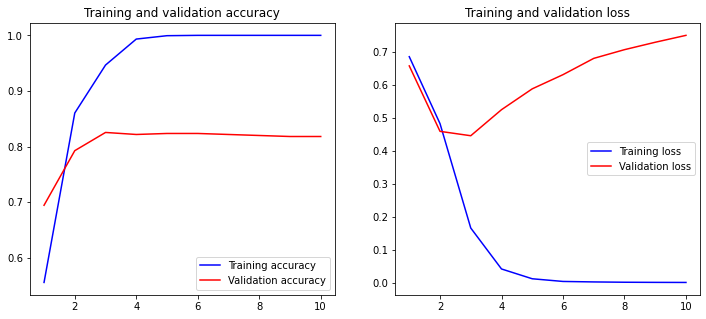

In [43]:
plot_history(history)

<center id="demo">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Une démo live 🧮
        </h2>
</center>

<span style="color:grey; font-size:1.2em">Enfin voici un champ de saisie en utilisant <b>ipywidgets, IPython.display</b> pour définir un widget et le contenu d'affichage aisnsi que l'input field. On utilise ce champ de saisie pour tester des phrases aléatoires de nos choix et obtenir une prediction et la certitude pour le Label.</span>

In [44]:
from ipywidgets import interact, widgets
from IPython.display import display, Markdown, Latex, clear_output

# définir les paramètres du widget
text = widgets.Text(
    value='',
    placeholder='type your description here',
    description='Description:',
    disabled=False
)
# affichage du text
display(text)

# appeler le widget
def callback(wdgt):
    clear_output()## Creating model
    display(text)
    # prendre la valeur d'input
    desc = wdgt.value
    
    # faire une prediction sur la description
    prediction_test = ANN_model.predict(vectorizer.transform([desc]))
    
    # obtenir la classe du text
    class_test = np.argmax(prediction_test)
    
    # obtenir la certitude du prediction
    certainty = prediction_test[0][class_test]
    
    # mapper chaque class a une phrase correspondante
    result = 'positive 😃' if class_test == 1 else 'negative 😞'
    
    # afficher le resultat
    display(Markdown('La description: "{}" est  {:.2f} %   {}'.format(desc,certainty*100,result)))

text.on_submit(callback)

Text(value='', description='Description:', placeholder='type your description here')

<center id="Conclusion">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Conclusion 📌
        </h2>
</center>

In [45]:
# résultats des différents modèles
